# LOAN PREDICTION

# WE will built our own model to predict for customers who are applying for the home loan company want to check the custumers are eligible for the home loan or not


# importing Libraries and Dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('loan-train[1].csv')


In [3]:
train_data.shape

(614, 13)

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Get Information about Our Dataset like
#Total Numbers of rows, Total Numbers of coloums
Data types of Each coloum And
NULL values


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.isnull().sum()*100/len(train_data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Performing EDA and

# Handling The Missing  Values With Mean,Median,Mode

In [8]:
train_data.drop(columns = 'Loan_ID' , axis = 1 , inplace = True)

In [9]:
train_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
train_data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [12]:
train_data['Gender'].fillna('Male', inplace = True)

In [13]:
train_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
train_data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [16]:
train_data['Married'].fillna('Yes', inplace = True)

In [17]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
train_data['Dependents'].replace('3+', '3', inplace =True)

In [19]:
train_data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [20]:
train_data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [21]:
train_data['Dependents'].fillna(0, inplace = True)

In [22]:
train_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train_data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [25]:
train_data['Self_Employed'].fillna('No', inplace = True)

In [26]:
train_data['LoanAmount'].median()

128.0

In [27]:
train_data['LoanAmount'].fillna(128.0, inplace = True)

In [28]:
train_data['Loan_Amount_Term'].median()

360.0

In [29]:
train_data['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [30]:
train_data['Credit_History'].unique()

array([ 1.,  0., nan])

In [31]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [32]:
train_data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [33]:
train_data['Credit_History'].fillna(1.0 , inplace = True)

In [34]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization By Plotting Graphs

number of people who take loan as Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

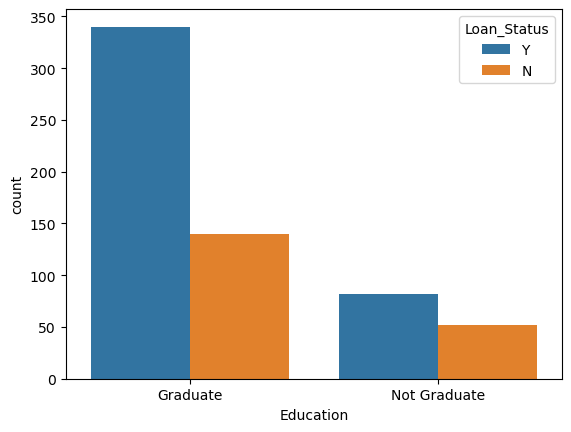

In [35]:
print("number of people who take loan as Education")
print(train_data["Education"].value_counts())
sns.countplot(x = 'Education',  hue = 'Loan_Status'  , data = train_data )

number of people who take loan as Married
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

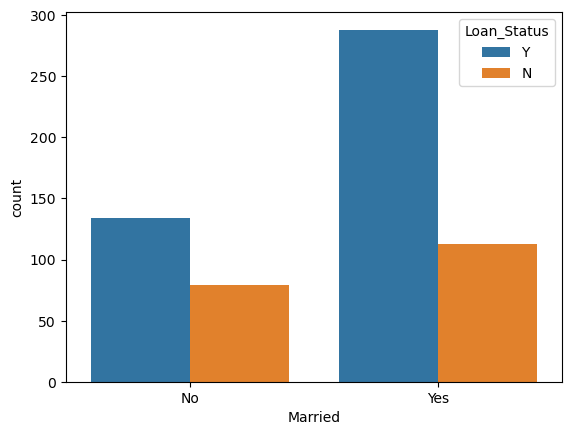

In [36]:
print("number of people who take loan as Married")
print(train_data["Married"].value_counts())
sns.countplot(x = 'Married',  hue = 'Loan_Status'  , data = train_data )

number of people who take loan as Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

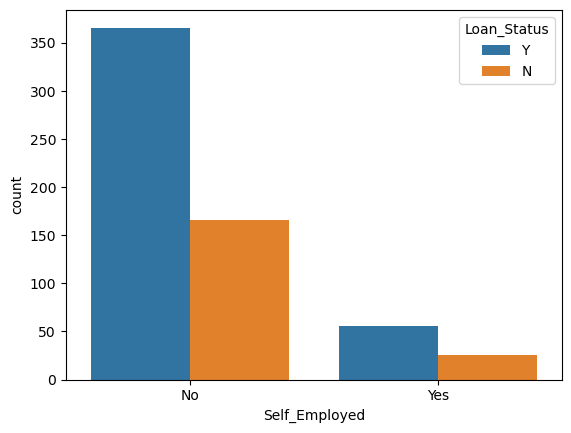

In [37]:
print("number of people who take loan as Self_Employed")
print(train_data["Self_Employed"].value_counts())
sns.countplot(x = 'Self_Employed',  hue = 'Loan_Status'  , data = train_data )

number of people who take loan as Gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

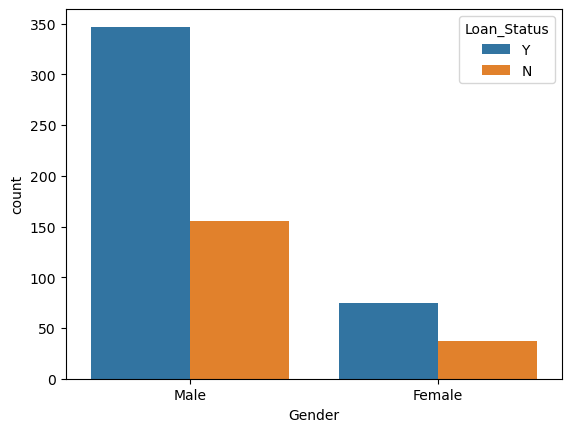

In [38]:
print("number of people who take loan as Gender")
print(train_data["Gender"].value_counts())
sns.countplot(x = 'Gender',  hue = 'Loan_Status'  , data = train_data )

number of people who take loan as LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

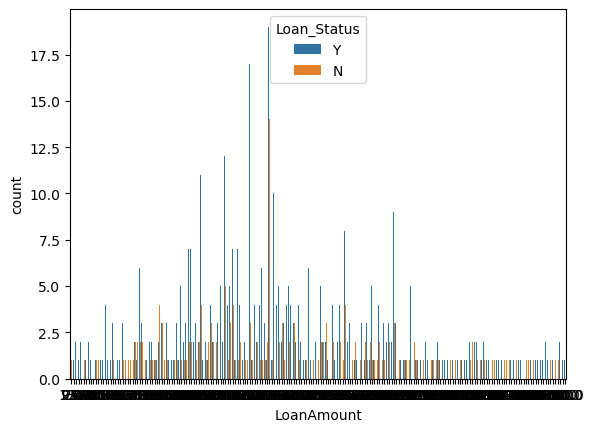

In [39]:
print("number of people who take loan as LoanAmount")
print(train_data["LoanAmount"].value_counts())
sns.countplot(x = 'LoanAmount',  hue = 'Loan_Status'  , data = train_data)

number of people who take loan as Credit_History 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

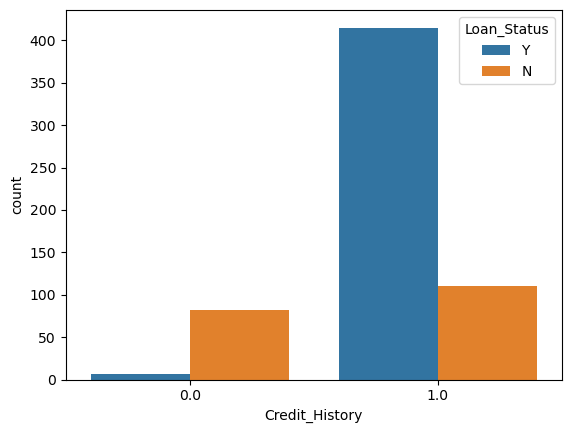

In [40]:
print("number of people who take loan as Credit_History ")
print(train_data["Credit_History"].value_counts())
sns.countplot(x = 'Credit_History',  hue = 'Loan_Status'  , data = train_data)

# Handling categorical column and Converting Categorical column To Numerical Values

In [41]:
train_data.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
335,Male,Yes,0,Graduate,Yes,5503,4490.0,70.0,360.0,1.0,Semiurban,Y
467,Male,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
556,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,Y


In [42]:
train_data.replace({'Married':{'No':0 , 'Yes':1}, 
                    'Gender':{'Male' : 1 , 'Female':0} ,
                   'Self_Employed' : {'No':0 , 'Yes':1} ,
                   'Property_Area' : {'Rural' : 0, 'Semiurban' : 1 , 'Urban': 2} ,
                   'Education': {'Graduate' : 1 , 'Not Graduate':0},
                   'Loan_Status':{'Y':1,'N':0}},
                    
                    inplace = True)

In [43]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Store Feature Matrix in X And Target in Y

# By Separating Data and Label

In [44]:
X = train_data.drop(columns = [ 'Loan_Status'], axis = 1)
Y = train_data['Loan_Status']

In [45]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [46]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Splitting The Dataset into Train,Test,Split

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.20 , random_state =0)
from sklearn.metrics import accuracy_score
from sklearn import metrics


# Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression


In [50]:
print(X.shape , X_train.shape , X_test.shape)

(614, 11) (491, 11) (123, 11)


In [51]:
model = LogisticRegression()
model.fit(X_train , Y_train)

y_prediction = model.predict(X_test)
print('Logistic Regression Accuracy = ' , metrics.accuracy_score(y_prediction , Y_test))

Logistic Regression Accuracy =  0.8373983739837398


# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test , Y_pred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

<AxesSubplot:>

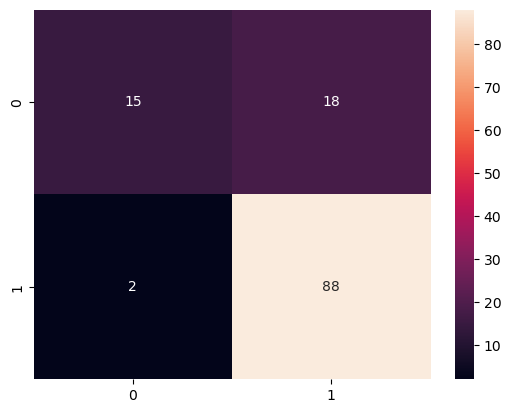

In [54]:
sns.heatmap(cm , annot = True)

In [55]:
accuracy_score(Y_test , y_prediction)

0.8373983739837398

In [56]:
from sklearn.metrics import accuracy_score , classification_report

In [57]:
print('classification_report:\n:' , classification_report(Y_test , y_prediction))

classification_report:
:               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [58]:
true_positive = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[0][0]

In [59]:
accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_Score:',accuracy)

Accuracy_Score: 0.8373983739837398


In [60]:
Precision = true_positive/(true_positive+false_positive)
print('Precision score:',Precision)

Precision score: 0.8301886792452831


In [61]:
Recall = true_positive/(true_positive+false_negative)
print('Recall_score:',Recall)

Recall_score: 0.9777777777777777


In [62]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8979591836734695

# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [64]:
classifier = RandomForestClassifier(n_estimators= 200,
                                    min_samples_split = 4,
                                    min_samples_leaf= 4,
                                    max_features= 'log2',
                                    max_depth= 5)

In [65]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=4, n_estimators=200)

In [66]:
y_pred = classifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  0.8292682926829268


# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB


In [81]:
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)


GaussianNB()

In [82]:
y_pred=NBClassifier.predict(X_test)

In [83]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  0.7886178861788617


# From the above initial model performance, so we see that Logistics regression has the highest Accuracy score